# SARA **COMMENT** CLASSIFICATION
### In this code I compare 2 different pre-processing step to doing classification

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os

In [0]:
data_dir = os.path.join('gdrive', 'My Drive', 'Assignment 1', 'data' )
# Reading training texts
cmt_norm_file = os.path.join(data_dir, 'sara', 'normal_comments.txt')
cmt_sara_file = os.path.join(data_dir, 'sara', 'sara_comments.txt')

In [0]:
# Read texts into list
def read_lines(filepath):
    with open(filepath, encoding='utf-8') as fp:
        content = fp.readlines()
        content = [x.strip() for x in content]
    return content
     

In [5]:
cmt_norm = read_lines(cmt_norm_file)
cmt_sara = read_lines(cmt_sara_file)
print('data set size: ',len(cmt_norm), len(cmt_sara))

data set size:  67222 17724


In [0]:
import pandas as pd
# create a dataframe for all training texts, with their labels
def create_dataframe_with_label(data, indeks):
    # make label
    label = []
    for _ in data:
        label.append(indeks)
    # create a pandas dataframe using texts and labels
    trainDF = pd.DataFrame()
    trainDF['text'] = data
    trainDF['label'] = label
    return trainDF

In [0]:
data_normal1 = create_dataframe_with_label(cmt_norm, 0)
data_sara1 = create_dataframe_with_label(cmt_sara, 1)
num_sara=len(data_sara1)
print('data set size: ',len(data_normal1), len(data_sara1))

data set size:  67222 17724


In [0]:
import copy
data_normal2=data_normal1.sample(num_sara)
data_sara2=data_sara1.copy()

In [0]:
data1=data_normal1
data1=data1.append(data_sara1)
data2=data_normal2
data2=data2.append(data_sara2)
print('Length of data1 : ', len(data_sara1), len(data_normal1), len(data1))
print('Length of data2 : ', len(data_sara2), len(data_normal2), len(data2))

Length of data1 :  17724 67222 84946
Length of data2 :  17724 17724 35448


In [0]:
# random data sample
data1.sample(10)

,text,label
39509,Datang ke mapolda jabar dulu Bib...hari ini ka...,0
33713,Keren jugaa nihhh mobil,0
703,"Wkwkkw parah nie cewe,masak si culun di samaka...",1
18891,Ketahuan deh hahahaha,0
12295,Berarti memek lo soak wkwkwkwk,1
56238,"Pak Polisi , coba tangkap 10 org peserta demo ...",0
45644,Hahahaha benar.....metro tv mantap.......ahok ...,0
58945,"FPI HARUSNYA BUAT NEGARA SENDIRI,BIAR SI RIZIQ...",0
2530,Ahok jengkel Ma'aruf sdh di sumpah tapi bohong...,1
23889,Mengerikan,0


In [0]:
data2.sample(10)

,text,label
2130,tindak tegas pak mentri klo ad yg melanggar. t...,1
11049,"Nah loh mampus luh hok, tangkap msukan penjara...",1
23463,Ada aqua,0
43348,Mana mgkn dia nonaktgkan si ahok wong anak ema...,0
48795,Ahok-jarot...jjjooossss.....lainnya....engngoo...,0
9815,Nuril itu penjilat bro,1
8405,Asal jangan menanggg isss. Menang gung malu....,0
3000,Mana nih pendukungnya si kafir???,1
56854,Gue gak percaya 1 anggota denjaka setara 120 a...,0
28213,"Ngomong u ke orangnya kalau berani,jangan bisa...",0


In [0]:
# plotting percetage of each categorical data
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import math
def pie_diagram_rating(df):
    frekuensi_rating=list(df['label'].value_counts())
    total = np.array(frekuensi_rating)*100/sum(frekuensi_rating)
    for i,v in enumerate(total) :
        total[i]=round(v,1)
    # Data to plot
    labels=[]
    for i in range(2):
        if i==0:
            nama='Normal Text'
        else:
            nama='Sara text'
        labels.append(nama+':'+str(total[i])+'%')
    sizes = frekuensi_rating
    colors = ['gold', 'red']
    # Plot
    figure(num=None, figsize=(4, 4), dpi=80, facecolor='w', edgecolor='k')
    patches, texts = plt.pie(sizes, shadow=True,colors=colors, startangle=140)
    plt.legend(patches, labels, loc="best")
    plt.axis()
    plt.show()

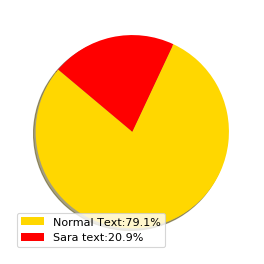

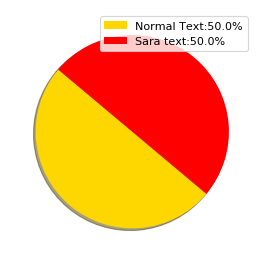

In [0]:
pie_diagram_rating(data1)
pie_diagram_rating(data2)

In [0]:
# load stopwords
def load_stop_words():
  # Get the set of stopwords
    stop_words_f = os.path.join(data_dir, 'dicts', 'stop_words.txt')
    flines = read_lines(stop_words_f)
    return set([x.strip() for x in flines])

In [0]:
stop_words = load_stop_words()
print(len(stop_words))

7193


In [0]:
# For cleansing
from bs4 import BeautifulSoup
import re
# text cleansing function
def raw_to_words(raw_text, stop_words=None):
    # 1. Remove HTML
    text_1 = BeautifulSoup(raw_text).get_text()
    
    # 2. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", text_1)
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()
    
    # 4. Remove stop words
    if stop_words:
        meaningful_words = [w for w in words if not w in stop_words]   
    else:
        meaningful_words = words
    
    # 5. Join the words back into one string separated by space & return
    return(" ".join(meaningful_words))

In [0]:
# cleaning the data
clean_data1 = data1
clean_data1['text'] = clean_data1['text'].apply(raw_to_words, stop_words=stop_words)
clean_data1 = clean_data1.loc[clean_data1['text']!='']

clean_data2 = data2
clean_data2['text'] = clean_data2['text'].apply(raw_to_words, stop_words=stop_words)
clean_data2 = clean_data2.loc[clean_data2['text']!='']

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [0]:
print(clean_data1.tail())
print(clean_data2.tail())

                                                    text  label
17719            dasar jongos pikiran butek kulit landak      1
17720           mending cepet m mpus deh ente tua bangke      1
17721  orang tua guru kyai munafik gal rela mui dipim...      1
17722                             orang bodoh ditanggapi      1
17723  dukung ahok klu dia islam islam ktp doang klu ...      1
                                                    text  label
17719            dasar jongos pikiran butek kulit landak      1
17720           mending cepet m mpus deh ente tua bangke      1
17721  orang tua guru kyai munafik gal rela mui dipim...      1
17722                             orang bodoh ditanggapi      1
17723  dukung ahok klu dia islam islam ktp doang klu ...      1


In [0]:
# Plot
#import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def show_wordcloud(data, stop_words, title=None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop_words,
        #max_words=200,
        max_font_size=80,
        width=800,
        height=600,
        ).generate(str(data))
    fig = plt.figure(1, figsize=(8, 6))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

In [0]:
#get negative samples
neg_samples1 = clean_data1.loc[clean_data1['label'] == 0]

# get positive sampels
pos_samples1 = clean_data1.loc[clean_data1['label'] == 1]

bigtext_sara1 = " ".join(list(pos_samples1['text']))
print('Big text from sara data1 :',len(bigtext_sara1))
bigtext_norm1 = " ".join(list(neg_samples1['text']))
print('Big text from normal data1 :', len(bigtext_norm1))

#get negative samples
neg_samples2 = clean_data2.loc[clean_data2['label'] == 0]

# get positive sampels
pos_samples2 = clean_data2.loc[clean_data2['label'] == 1]

bigtext_sara2 = " ".join(list(pos_samples2['text']))
print('Big text from sara data2 :',len(bigtext_sara2))
bigtext_norm2 = " ".join(list(neg_samples2['text']))
print('Big text from normal data2 :',len(bigtext_norm2))

Big text from sara data1 : 1303515
Big text from normal data1 : 3586911
Big text from sara data2 : 1303515
Big text from normal data2 : 935418


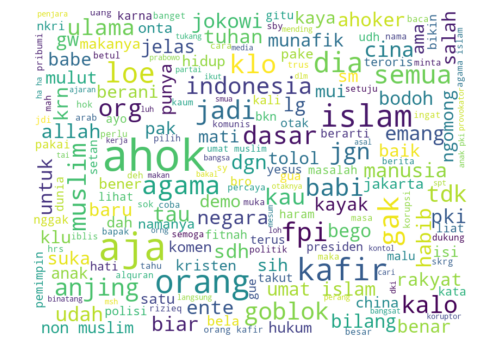

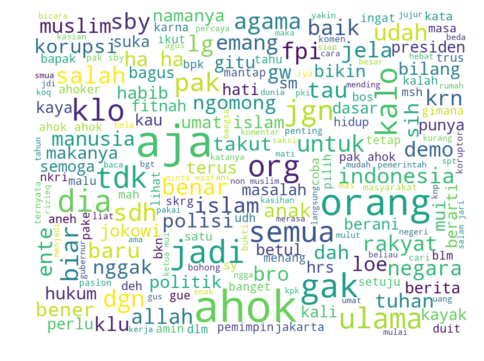

In [0]:
# from data 1
show_wordcloud(bigtext_sara1, stop_words)
show_wordcloud(bigtext_norm1, stop_words)

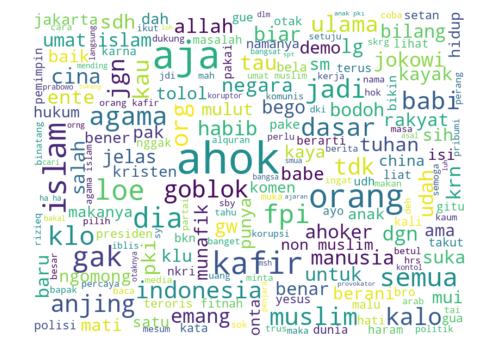

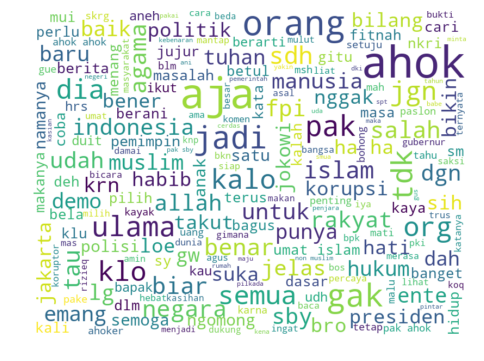

In [0]:
# from data 2
show_wordcloud(bigtext_sara2, stop_words)
show_wordcloud(bigtext_norm2, stop_words)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn import decomposition, ensemble
from sklearn.model_selection import cross_val_score

In [0]:
# split the dataset into training and validation datasets
train_x1, valid_x1, train_y1, valid_y1 = model_selection.train_test_split(clean_data1['text'], clean_data1['label'])
print('Training and Testing data from data1 : ',len(train_x1), len(valid_x1))

train_x2, valid_x2, train_y2, valid_y2 = model_selection.train_test_split(clean_data2['text'], clean_data2['label'])
print('Training and Testing data from data2 : ',len(train_x2), len(valid_x2))

Training and Testing data from data1 :  62821 20941
Training and Testing data from data2 :  26339 8780


In [0]:
# create a count vectorizer
count_vect1 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect1.fit(clean_data1['text'])
# transform the training and validation data using count vectorizer
xtrain_count1 = count_vect1.transform(train_x1)
xvalid_count1 = count_vect1.transform(valid_x1)
print('DTM matriks from data1 shape : ',xtrain_count1.shape, xvalid_count1.shape)

# word level tf-idf
tfidf_vect1 = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect1.fit(clean_data1['text'])
xtrain_tfidf1 = tfidf_vect1.transform(train_x1)
xvalid_tfidf1 = tfidf_vect1.transform(valid_x1)
print('DTM matriks after tf-idf from data1 shape : ',xtrain_tfidf1.shape, xvalid_tfidf1.shape)

# create a count vectorizer
count_vect2 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect2.fit(clean_data2['text'])
# transform the training and validation data using count vectorizer
xtrain_count2 = count_vect2.transform(train_x2)
xvalid_count2 = count_vect2.transform(valid_x2)
print('DTM matriks from data2 shape : ',xtrain_count2.shape, xvalid_count2.shape)

# word level tf-idf
tfidf_vect2 = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect2.fit(clean_data2['text'])
xtrain_tfidf2 = tfidf_vect2.transform(train_x2)
xvalid_tfidf2 = tfidf_vect2.transform(valid_x2)
print('DTM matriks after tf-idf from data2 shape : ', xtrain_tfidf2.shape, xvalid_tfidf2.shape)

DTM matriks from data1 shape :  (62821, 53647) (20941, 53647)
DTM matriks after tf-idf from data1 shape :  (62821, 53647) (20941, 53647)
DTM matriks from data2 shape :  (26339, 33993) (8780, 33993)
DTM matriks after tf-idf from data2 shape :  (26339, 33993) (8780, 33993)


In [0]:
#train model
logistic_r1 = linear_model.LogisticRegression(multi_class='ovr',solver='sag')
logistic_r1.fit(xtrain_tfidf1, train_y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:

logistic_r2 = linear_model.LogisticRegression(multi_class='ovr',solver='sag')
logistic_r2.fit(xtrain_tfidf2, train_y2)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

DATA 1

In [0]:
# get the predictions
pred_valid1 = logistic_r1.predict(xvalid_tfidf1)
print("Validation set")
print("Accuracy:", metrics.accuracy_score(pred_valid1, valid_y1))
print("Report:\n", metrics.classification_report(valid_y1, pred_valid1))

Validation set
Accuracy: 0.8670073062413447
Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     16485
           1       0.88      0.43      0.58      4456

   micro avg       0.87      0.87      0.87     20941
   macro avg       0.87      0.71      0.75     20941
weighted avg       0.87      0.87      0.85     20941



DATA 2

In [0]:
# get the predictions
pred_valid2 = logistic_r2.predict(xvalid_tfidf2)
print("Validation set")
print("Accuracy:", metrics.accuracy_score(pred_valid2, valid_y2))
print("Report:\n", metrics.classification_report(valid_y2, pred_valid2))

Validation set
Accuracy: 0.7738041002277904
Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      4337
           1       0.81      0.72      0.76      4443

   micro avg       0.77      0.77      0.77      8780
   macro avg       0.78      0.77      0.77      8780
weighted avg       0.78      0.77      0.77      8780



In [0]:
x=[]
text='ahok musuh islam'
x.append(text)
coba = tfidf_vect.transform(x)
doc_by_term=pd.DataFrame(coba.toarray(), columns=tfidf_vect.get_feature_names())

# TEST USING TEKS

In [0]:
def predict(teks):
  x=[]
  x.append(teks)
  clean_teks=raw_to_words(teks, stop_words=stop_words)
  clean_tekstfidf1 = tfidf_vect1.transform(x)
  clean_tekstfidf2 = tfidf_vect2.transform(x)
  doc_by_term1=pd.DataFrame(clean_tekstfidf1.toarray(), columns=tfidf_vect1.get_feature_names())
  doc_by_term2=pd.DataFrame(clean_tekstfidf2.toarray(), columns=tfidf_vect2.get_feature_names())
  pred1 = logistic_r1.predict(doc_by_term1)
  pred2 = logistic_r2.predict(doc_by_term2)
  print('Based on data1 your comment is : ',label_predict(pred1))
  print('Based on data2 your comment is : ',label_predict(pred2))
  
def label_predict(arr):
  if arr==[0]:
    return 'Normal :-)'
  elif arr==[1] :
    return 'Sara :-)'
  

In [0]:
print('Input your own comment : ')
teks=input()
print('------------------------result------------------')
predict(teks)

Input your own comment : 
Kapan indonesia bisa maju
------------------------result------------------
Based on data1 your comment is :  Normal :-)
Based on data2 your comment is :  Normal :-)


In [0]:
print('Input your own comment : ')
teks=input()
print('------------------------result------------------')
predict(teks)

Input your own comment : 
Islam anti ahok
------------------------result------------------
Based on data1 your comment is :  Normal :-)
Based on data2 your comment is :  Sara :-)


In [0]:
print('Input your own comment : ')
teks=input()
print('------------------------result------------------')
predict(teks)

Input your own comment : 
Islam anti ahok, kalau anda islam dan percaya ahok anda kafir
------------------------result------------------
Based on data1 your comment is :  Sara :-)
Based on data2 your comment is :  Sara :-)


In [0]:
print('Input your own comment : ')
teks=input()
print('------------------------result------------------')
predict(teks)

Input your own comment : 
jangan menyebut orang lain kafir, berkacalah
------------------------result------------------
Based on data1 your comment is :  Sara :-)
Based on data2 your comment is :  Sara :-)
